In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']
data.head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

# Numpy array'e çeviriyoruz verileri şuan kullanılabilir değil

In [7]:
data = np.array(data).reshape(-1,1)
type(data)

numpy.ndarray

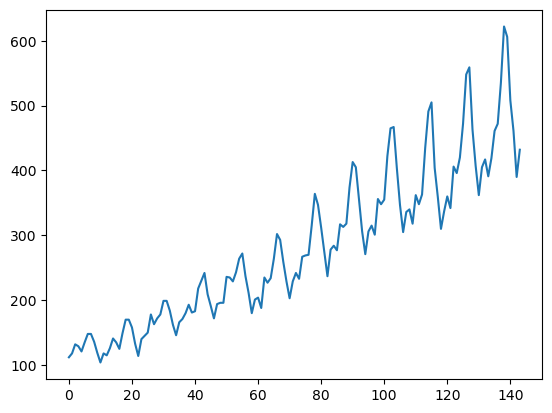

In [8]:
plt.plot(data)
plt.show()

# İlk 100'ü train için kalanını test için kullanacağız.

In [15]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [16]:
train = data[0:100,:]
test = data[100:,:]

In [20]:
def get_data(data, steps): #steps = step size yani alınacak yolcu ay sayısı
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
steps = 2

In [23]:
X_train, y_train = get_data(train,steps)
X_test, y_test = get_data(test,steps)

# LSTM Modeli için yeniden şekillendiriyoruz.

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Sequential modelimizi oluşturuyoruz...

In [25]:
model = Sequential()
model.add(LSTM(128, input_shape=(1,steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


# Modelimizi eğitiyoruz.

In [27]:
model.fit(X_train,y_train,epochs=25,batch_size=1)

Epoch 1/25
97/97 [==============================] - 4s 4ms/step - loss: 0.0101
Epoch 2/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 3/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 4/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 5/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 6/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 8/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 9/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 10/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 11/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/25
97/97 [==============================

In [28]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 5ms/step


In [29]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

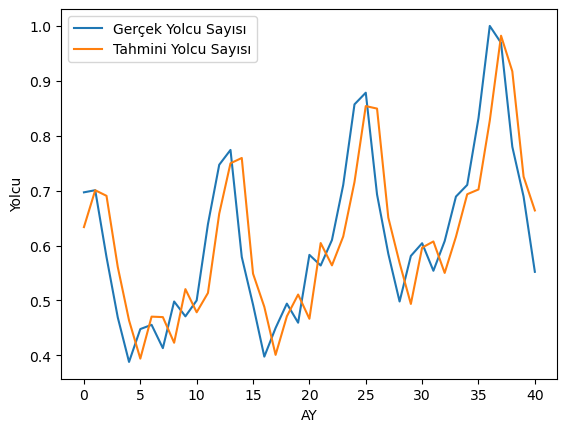

In [30]:
plt.plot(y_test, label = 'Gerçek Yolcu Sayısı')
plt.plot(y_pred, label = 'Tahmini Yolcu Sayısı')
plt.xlabel('AY')
plt.ylabel('Yolcu')
plt.legend()
plt.show()